# Machine Learning
## Tarea 2 : Problemas de "Decision Trees & Random Forest" y "Aprendizaje no supervisado"
---
__PROFESOR : Rodrigo Hernández__

__ALUMNOS : Roy Barrera - José Pérez__

---

# Problema de Aprendizaje no supervisado

---

__1 CONTEXTO__ 

Puesto que para esta segunda tarea y final del curso Machine Learning, se ha permitido usar el mismo DataSet empleado en la primera tarea, es que aplicaremos una perspectiva exploratoria sobre el  presupuesto familiar mensual en la ciudad de Santiago de Chile, aplicando modelos de Aprendizaje no supervisado. Especificamente aplicaremos el algoritmos de cluster K-Means y análisis de componentes principales PCA.

Una consideración muy importante a tener en cuenta; para la elaboración de este Jupyter-Notebook, se ha usado como base, el Jupyter Notebook "clase6.ipynb", presentado por el profesor del curso Machine Learning MDS'19, Rodrigo Hernández.

Dicho todo lo anterior, la pregunta de valor que se quiere responder es:

__2 PREGUNTA DE VALOR__


¿Podremos clusterizar "correctamente" a los grupos familiares, según su presupuesto mensual?, ¿para este DataSet, entre la clusterización usando K-Means y  análisis de componentes principales PCA, cual de ellos tiene un mejor resultado de cara a su exploración?


Como se dijo previamente, ya se cuenta con un set de datos previamente trabajado a partir a del "VIII Encuesta de Presupuestos Familiares (EPF)". Se estudio el DataSet, eliggiendo las variables candidatas a ser usadas. Se realizó una limpieza de los datos, de para asegurar el correcto funcionamiento de las operaciones a ser realizadas sobre los mismos.


In [1]:
# Son importadas las librerias requeridas.


# Librería para la gestión y manipulación de DataFrames.
import pandas as pd
# Librerías para la gestión y manipulación de gráficos.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


# Librería para seteo de argumentos de entrada para ML.
import numpy as np
# Librería para estadísticos de base.
from scipy import stats
# Librería para preprocesamiento.
from sklearn import preprocessing
# Librería para el algoritmo kMeans.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import decomposition
# Librería para análisis de componentes principales PCA.
from sklearn.decomposition import PCA


__3 DESCRIPCION DE LOS DATOS__

Tener presente que a priori el DataSet a usar el el mismo que se emplea para el problema de Clasificadores , mediante "Decision Tree & Random Forest". Dicho lo anterior, se efectuó una labor de  Exploración de los datos, preseleccionando un subconjunto de datos que llamamos 'Gasto_x_Familia.csv'. Los detalles de esto, se pueden apreciar en el archivo Tarea2_ML_BarreraPerez_01_EXPLORACION_v1.pdf

In [2]:
# Es leido el archivo con el set de datos. Recordar que este set de datos esta previamente trabajado, incorporando
# aquellas variables pre-candidatas a ser usadas.
df_t01 = pd.read_csv('Gasto_x_Familia.csv', sep=';', decimal='.')

__3.1 Resumen del tipo de datos utilizados__

Mediante la función info(), se obtiene resumen de los datos usados.

In [3]:
# Miramos las variables pre-candidatas a ser usadas, los nombres de las columnas y su tipo. También miramos la
# cantidad de muestras del set de datos. Se ve que hay 10 variables, con 4.941 muestras. Y en donde todas las
# muestras tienen valor NO nulo.
df_t01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4941 entries, 0 to 4940
Data columns (total 10 columns):
Personas             4941 non-null int64
Gastos               4941 non-null int64
Ingresos             4941 non-null int64
Categoria            4941 non-null object
G1_Alimentacion      4941 non-null float64
G2_Bebidas           4941 non-null float64
G8_Comunicaciones    4941 non-null float64
G9_Recreacion        4941 non-null float64
G10_Educacion        4941 non-null float64
G11_Restaurantes     4941 non-null float64
dtypes: float64(6), int64(3), object(1)
memory usage: 386.1+ KB


__3.2 Descripción del comportamiento univariado__

Se usa la función describe(), para conocer el comportamiento univariado del set de datos. Obteniendo valores tales como cantidad, media, desviación estándar y mínimo entre otros. 

In [4]:
# Miramos los valores estadisticos de las variables del set de datos.
df_t01.describe()

,Personas,Gastos,Ingresos,G1_Alimentacion,G2_Bebidas,G8_Comunicaciones,G9_Recreacion,G10_Educacion,G11_Restaurantes
count,4941.000000,4.941000e+03,4.941000e+03,4.941000e+03,4941.000000,4941.000000,4.941000e+03,4.941000e+03,4.941000e+03
mean,3.970451,1.614312e+06,1.923799e+06,2.749368e+05,30510.643128,80189.430258,1.144853e+05,1.506017e+05,1.087676e+05
std,1.548781,1.308729e+06,2.069036e+06,1.785312e+05,42820.808602,60006.240471,1.764910e+05,2.194059e+05,1.499305e+05
min,1.000000,6.237700e+04,3.070000e+02,1.937500e+03,3.216987,3.684826,3.352893e+01,6.429251e+00,3.747312e+01
25%,3.000000,7.897710e+05,7.466670e+05,1.532214e+05,5000.000000,40113.968095,2.528150e+04,4.291667e+03,2.179672e+04
50%,4.000000,1.224790e+06,1.280000e+06,2.376860e+05,15684.408430,67458.153461,6.060895e+04,6.793332e+04,6.066429e+04
75%,5.000000,1.982535e+06,2.252900e+06,3.550237e+05,39679.998779,105031.643441,1.323217e+05,2.037500e+05,1.339603e+05
max,17.000000,1.897800e+07,3.026667e+07,2.407691e+06,517805.942127,770836.560757,2.391135e+06,2.397525e+06,2.536041e+06


__3.3 Escalamiento de la data__


Para asegurar la consistencia en las unidades de medida usadas, se usa el puntaje Z, logrando ajustar a una desviación típica, con media 0 y desviación estándar 1.


In [5]:
# Se obtiene una copia el DataFrame df_t01
df_t02=df_t01.copy()

# Se obtiene un DataFrame con atributos numéricos.
df_t03=df_t01.select_dtypes(include=[np.number])

# Se aplica la lógica para el escalamiento mediante puntaje z
df_t03 = (df_t03 - df_t03.mean()) / df_t03.std()

# Se reemplazan los datos del DataFrame df_t02
df_t02[df_t03.columns] = df_t03
df_t02


,Personas,Gastos,Ingresos,Categoria,G1_Alimentacion,G2_Bebidas,G8_Comunicaciones,G9_Recreacion,G10_Educacion,G11_Restaurantes
0,0.664748,-0.173006,-0.688043,1.Bajo,0.034523,0.291505,-0.074926,-0.284484,-0.504339,-0.471023
1,0.019079,0.203729,0.296104,2.Medio,-0.106218,2.489509,0.512278,0.501874,-0.471825,0.266565
2,0.664748,-0.164157,-0.499653,1.Bajo,-0.406612,-0.705346,1.084566,-0.365206,-0.236518,-0.560839
3,-1.272260,-0.973309,-0.887756,1.Bajo,-0.904005,-0.697028,-0.667855,-0.642799,-0.268612,-0.646540
4,-1.917929,-0.370717,-0.547018,1.Bajo,-1.455974,-0.383240,-0.086482,0.201227,0.582930,-0.416905
...,...,...,...,...,...,...,...,...,...,...
4936,-0.626591,-0.687790,-0.242045,2.Medio,-0.967877,-0.709836,-0.619759,-0.647657,0.746018,-0.723107
4937,-1.917929,0.677035,0.834785,3.Alto,0.089535,-0.702556,0.689172,-0.273514,-0.678882,-0.625181
4938,0.019079,0.099990,0.031996,2.Medio,1.550507,1.894986,0.354951,-0.595309,-0.186109,-0.259106
4939,-0.626591,0.509089,0.318633,2.Medio,0.856957,-0.498348,1.323045,-0.487334,-0.365844,-0.501247


__3.4 Gráfico de Matriz__

A continuación se realiza una gráfica de matriz para describir aquellas asociaciones visuales que nos pudiesen parecer relevantes. Este gráfico de matriz aplica sobre los datos ya escalados.

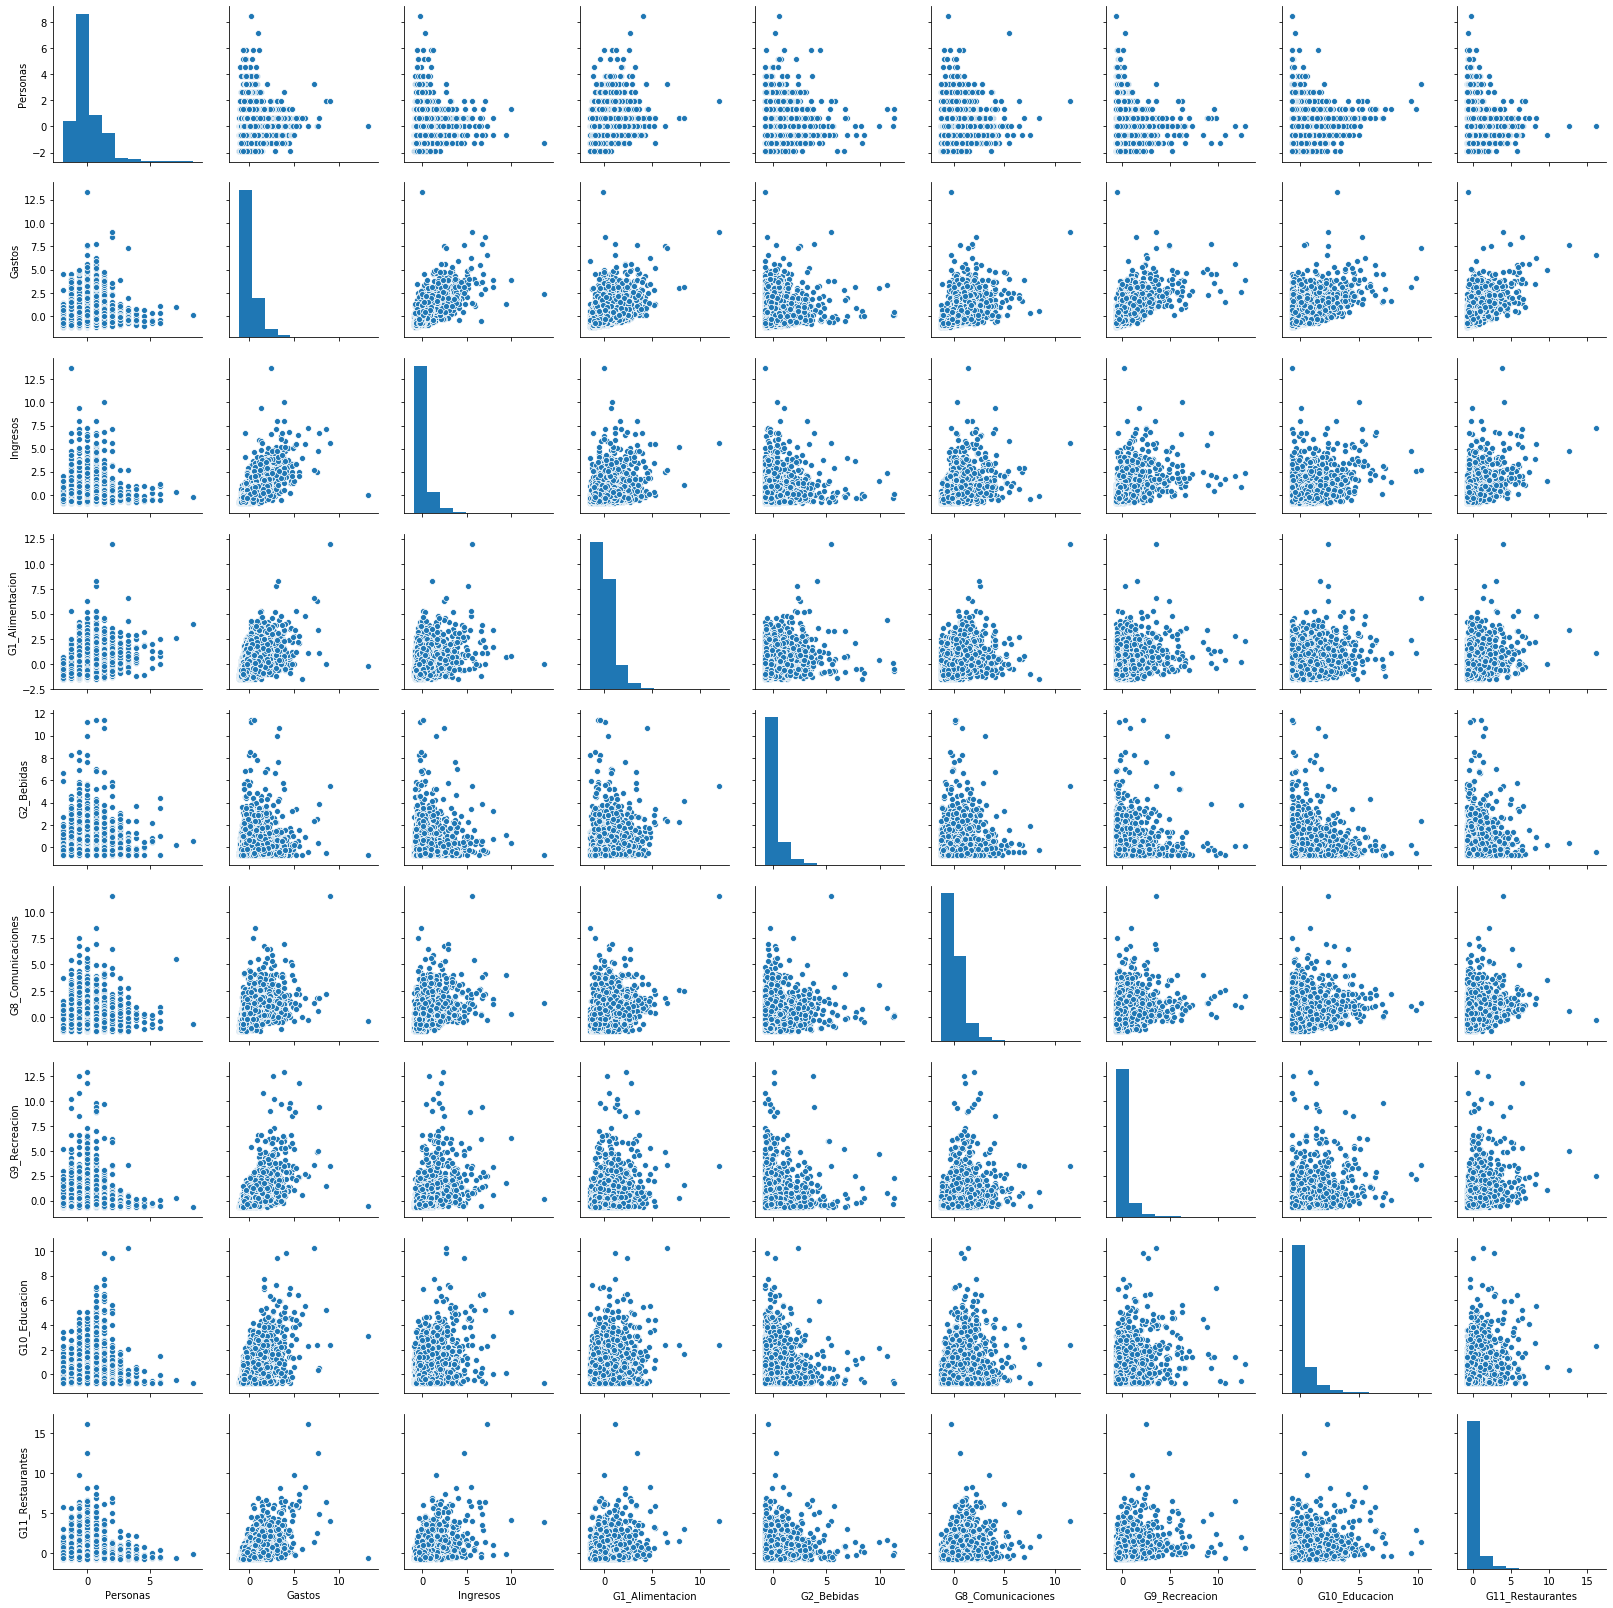

In [6]:
# Gráfica de matriz de los datos escalados. Para el caso del escalamiento de datos, ocurre una suerte de 
# "acercamiento de los outliers"
sns.pairplot(df_t02, kind="scatter")
plt.show()

Si bien es cierto se dijo que cuando se escalan los datos, ocurre una suerte de "acercamiento de los outliers", al observar su gráfico de matriz, siguen apareciendo outliers. Es decir, ocurre un "acercamiento de los outliers, y en este DAtaSet en particular no elimina por completo los outliers. Basta con observar las filas "Gastos", "Ingresos", "G1_Alimentación".

Llama la atención la fila "Gastos" pues se ve que no necesariamente las familias que tienen un mayor número de personas son las que tienen un mayor gastos.
Se ve también que para el caso de la fila "Gastos", hay una tendencia a que las familias con mayores ingresos tengan mayores gastos. No obstante ello, se ve en la gráfica que existen outliers.



__3.5 Aplicación de Algoritmo KMEANS__

Para la aplicación del algoritmo de KMEANS, hay una serie de tareas a realizar, a saber:

1.- Adecuación de la data.

2.- Obtención del mejor K de Cluster, usando para ello Elbow y Silhouette

3.- Una vez elegido el K óptimo, aplicamos KMEANS


In [7]:
# 1.- Se adecua la data para el algoritmo de KMENAS
x=df_t02.drop('Categoria', axis=1)

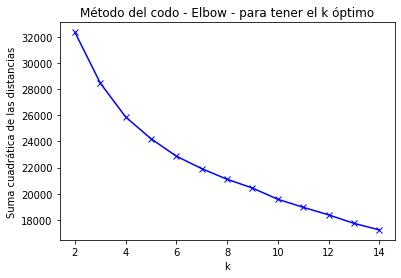

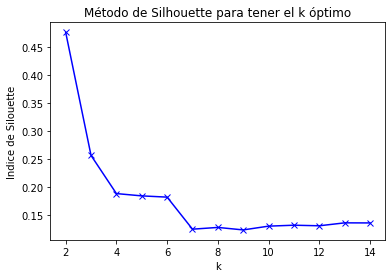

In [8]:
# 2.- Obtención del mejor K de Cluster, usando para ello Elbow y Silhouette


# Lista para guardar cada indice de inercia para cada solucion. Método Elbow.
Inercia = []
#Lista para guardar cada indice de Silhouette para cada solucion- Método Silhouette.
Silhouette=[]

# A priori se define un vector con un rango de soluciones de 2 a 15 K(cantidad de Clusters)
K = range(2,15)

# Iteración para cada solución ( desde 2 a 15 cluters)
for k in K:
    # Instanciación del algoritmo Kmeans
    km = KMeans(n_clusters=k, init='random', random_state=0)
    # Es ajustada la instancia del algoritmo Kmeans usando la data del DataSet, para Elbow.
    km = km.fit(x)
    # Es ajustada la instancia del algoritmo Kmeans usando la data del DataSet, para Silhouette.
    km1 = km.fit_predict(x) 
    # Se realiza el calculamos silhouette
    sil_prom= silhouette_score(x, km1)
    # Son guardados los valores para Elbow y Silhouette para cada k.
    Inercia.append(km.inertia_)
    Silhouette.append(sil_prom)

# Es graficado el resultado para Elbow.  
plt.plot(K, Inercia, 'bx-')
plt.xlabel('k')
plt.ylabel('Suma cuadrática de las distancias')
plt.title('Método del codo - Elbow - para tener el k óptimo')
plt.show()

#Es graficado el resultado para Silhouette 
plt.plot(K, Silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Indice de Silouette')
plt.title('Método de Silhouette para tener el k óptimo')
plt.show()

Conforme las gráficas arriba, es que se elige k = 4, para con este valor aplicar entonces el algoritmo de Kmeans. Hemos de reconocer que si ben es cierto "el codo", no es tan evidente en k=4, al considerar en conjunto ambos graficos, Elbow y Silhoutte, la elección de K=4 parece adecuada.

/home/pepeperez/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/pepeperez/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


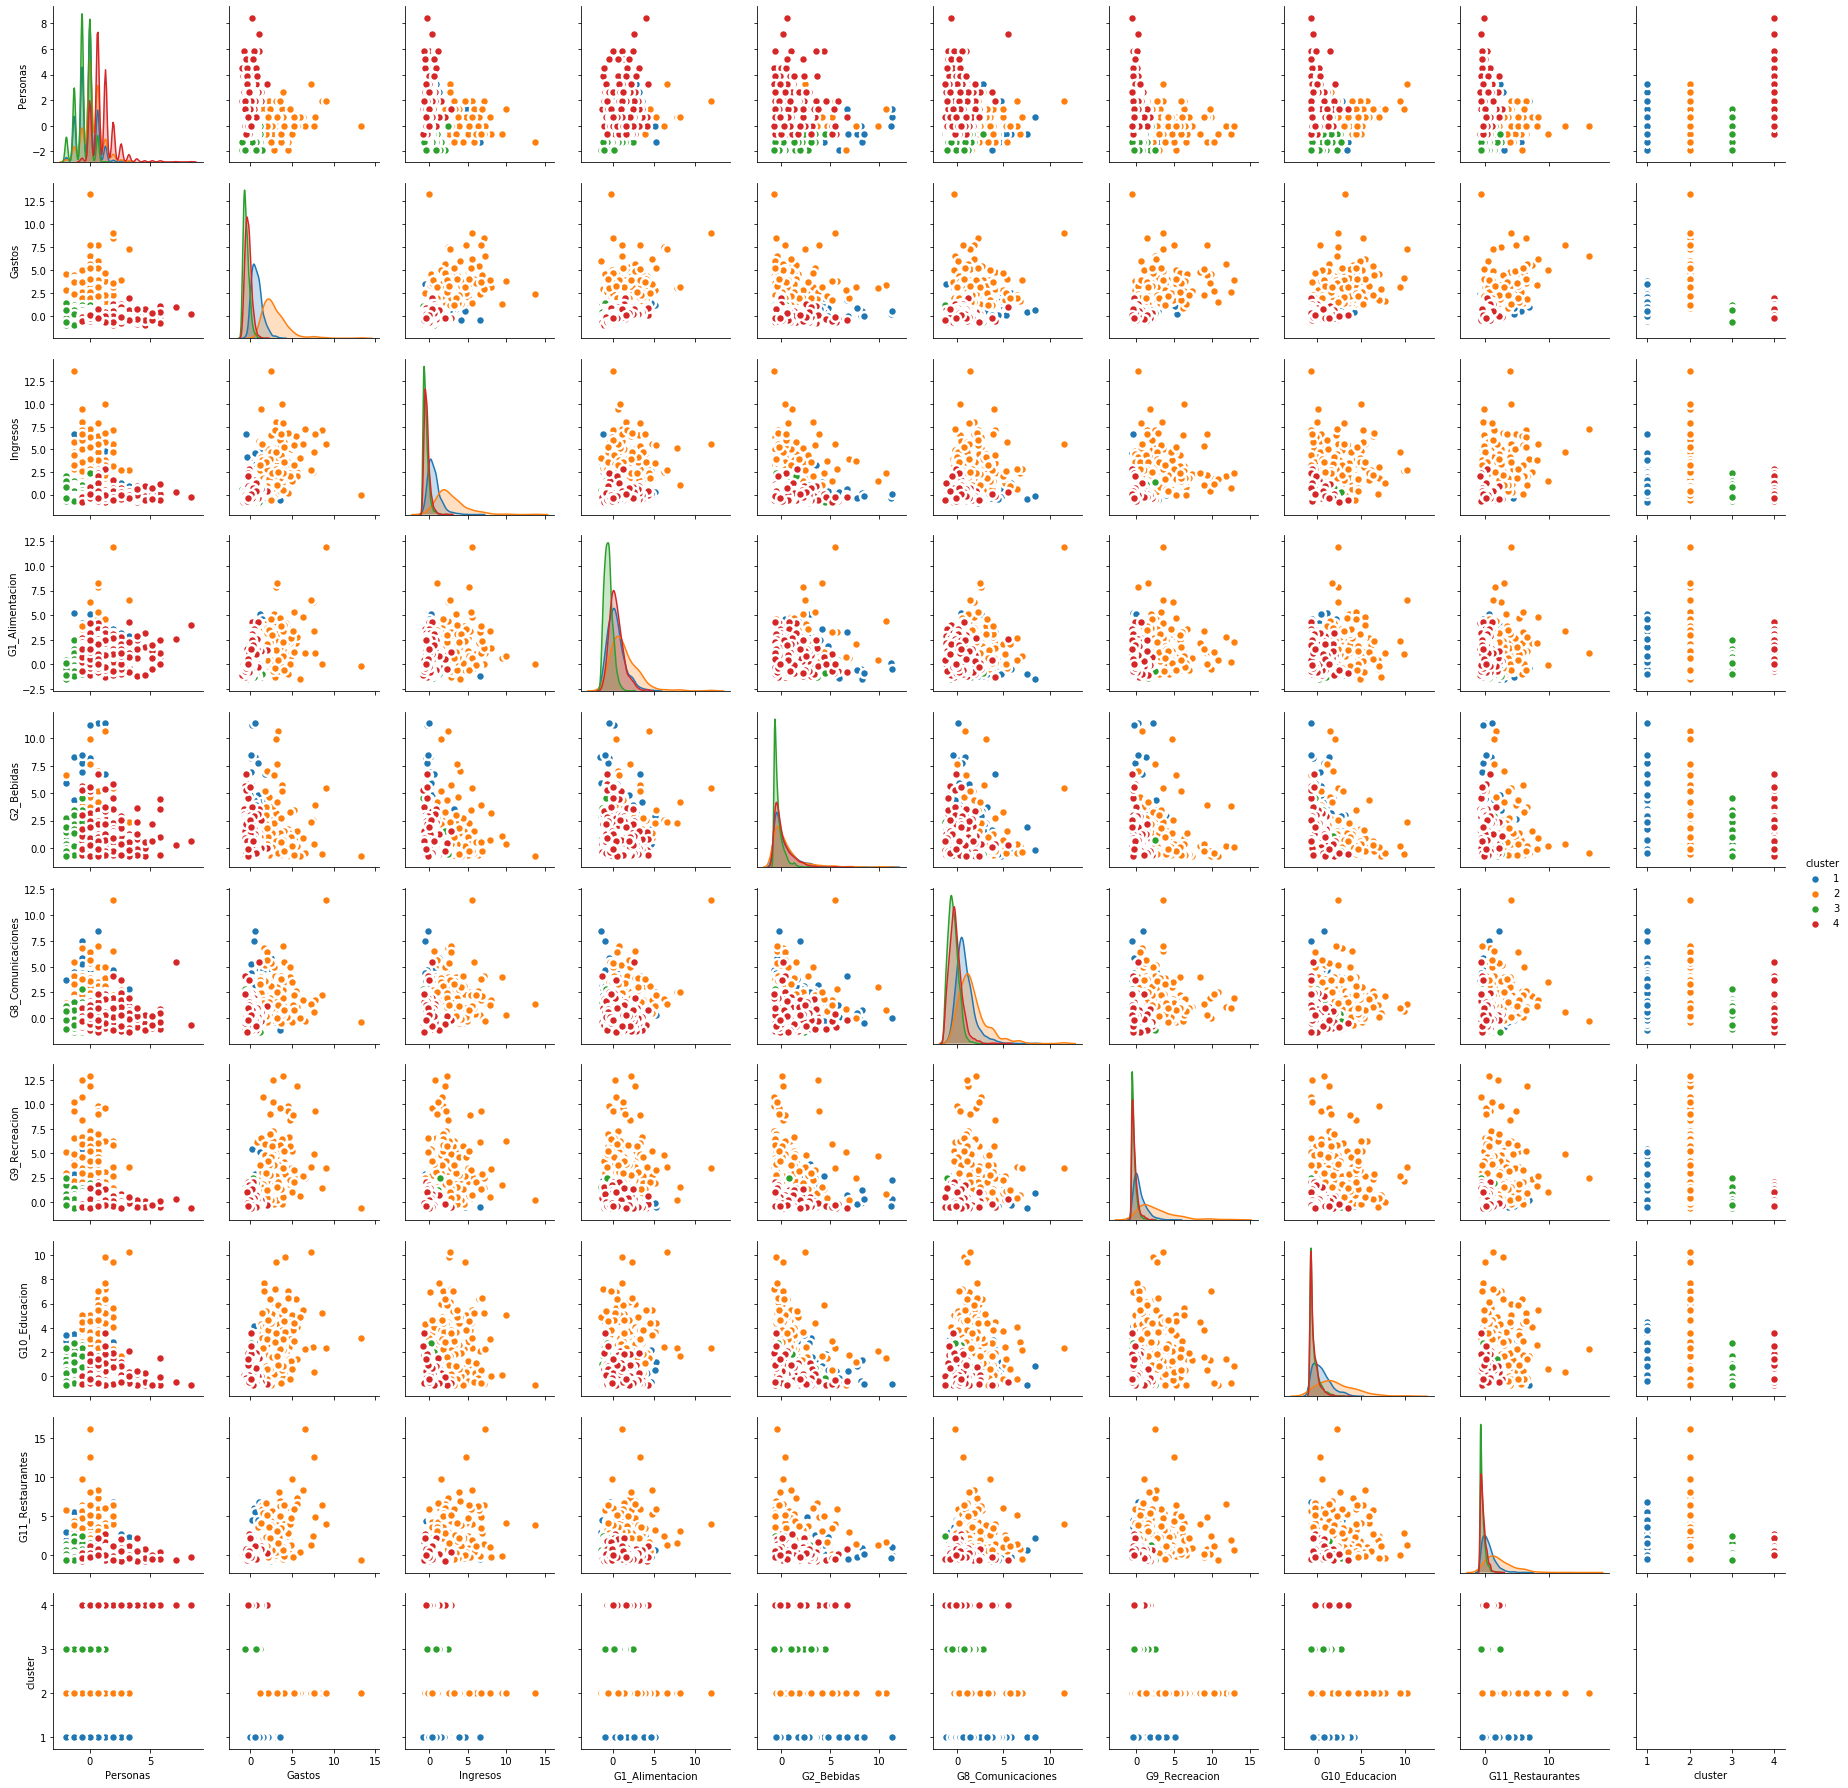

In [9]:
# 3.- Aplicación de KMEANS y visualización de Cluster, vía grafica de matriz. 
# Dasa la elección de k=4 entonces ya estamos en concidiones de aplicar KMEANS.


# Se instancia Kmeans con k=4, número de cluster.
km_final = KMeans(n_clusters=4, init='random', random_state=0)

# Se ajusta el algoritmo según la data del DataSet que tenemos.
km_final_lab = km_final.fit_predict(x)

# Se aplica la lógica para la visualización de los cluster, mediante una grafica de matriz.
df_t02['cluster'] = pd.Series(km_final_lab, index=df_t02.index)
df_t02['cluster'] = df_t02['cluster'].add(1) 
#df_t02

# Se grafica.
sns.pairplot(df_t02, kind="scatter", hue="cluster", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()


In [10]:
# Se ve ahora la cantidad de familias por cada uno de los 4 cluster.
num_fam= np.bincount(df_t02['cluster'])
num_fam


array([   0, 1062,  242, 2385, 1252])

Se tiene entonces que la cantidad de familias por Cluster es:
Cluster 1: 1062 familias.
Cluster 2:  242 familias.
Cluster 3: 2385 familias.
Cluster 4: 1252 familias.

__3.6 Aplicación de Algoritmos jerárquicos__

Aún cuando no fue solicitado, se aplicarán los algoritmos jerárquicos.
A priori podemos decir que el tamaño del DataSet, es "grande" para estos algoritmos.
Lo anterior será reflejado en lo complejo que puede ser la visualización de estos grupos de clusters.

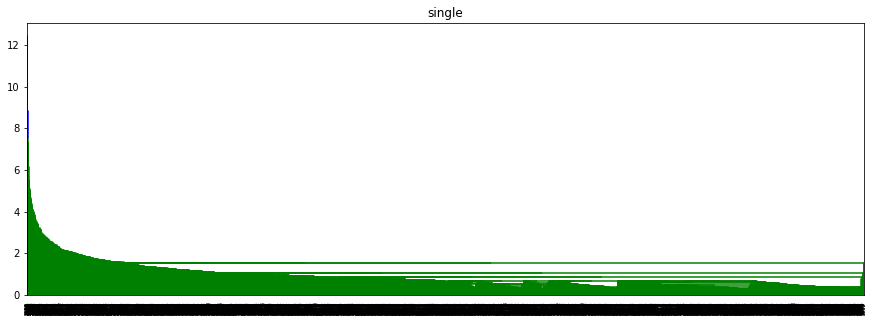

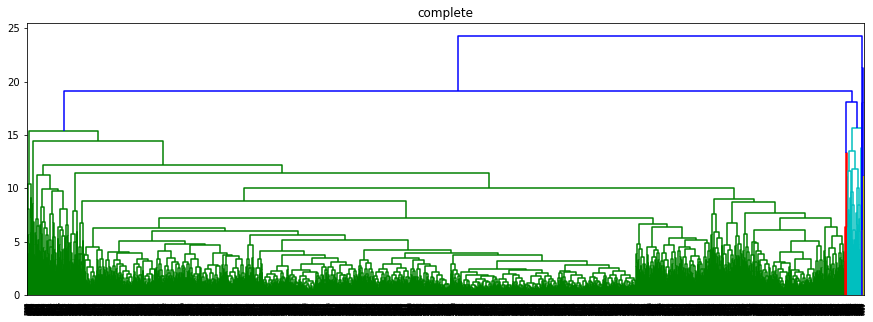

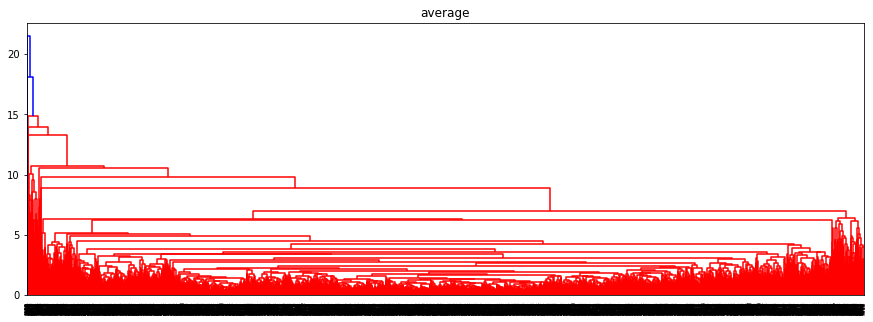

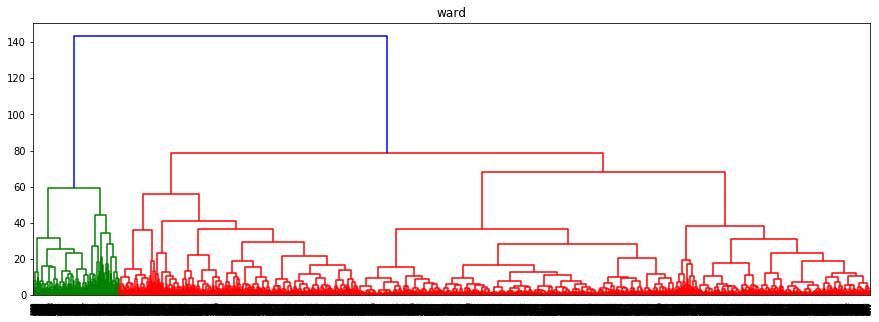

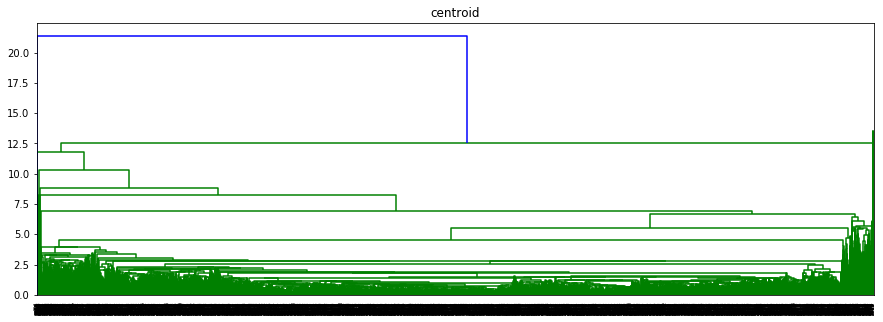

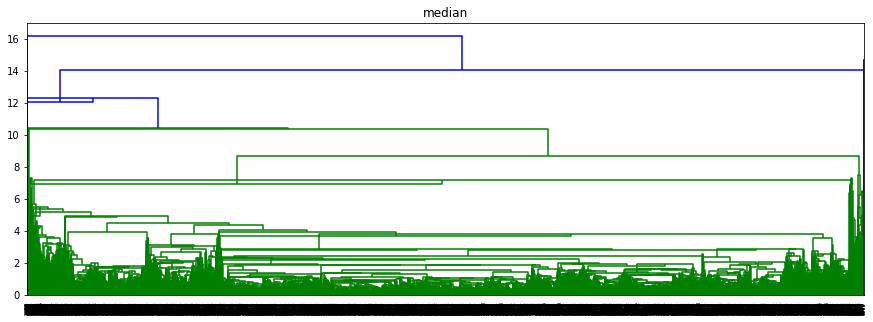

In [11]:
# Usaremos el código visto en la clase 6 del curso Machine Learning, 
# para aplicar los algoritmos jerárquicos.
for method in ('single', 'complete', 'average', 'ward', 'centroid', 'median'):
    matrix = linkage(x, method=method)
    plt.figure(figsize=(15, 5))
    dendrogram(matrix)
    plt.title(method)
    plt.show()

Tal como se anticipó, la visualización de este agrupamiento de cluster mediante algoritmos jerárquicos es compleja, dado el tamaño del DataSet que estamos usando.

__3.7 Aplicación de Algoritmo PCA__

A continuación aplicaremos el algortimo "Análisis de Componentes Principales", PCA.

Para elegir el número de componentes, usaremos la varianza explicada acumulada.

Mediante la matriz de correlación, se asociarán los componentes y las características del DataSet usado.

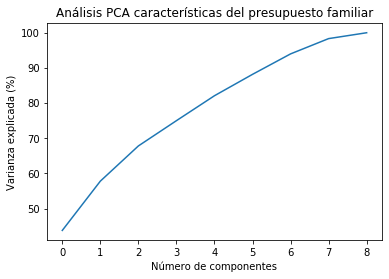

In [12]:
# Es ajustado el algoritmo PCA sobre el total de las caracteristicas
# del DataSet usado.

pca = PCA().fit(x)

# Es graficada la varianza explicada acumulada.
plt.figure()

# Se obtine la suma acumulada del ratio de varianza explicada,
# multiplicada por 100.
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada (%)') 
plt.title('Análisis PCA características del presupuesto familiar')
plt.show()

Al observar la gráfica de arriba, se tiene que con 6 componentes entonces se logra sobre un 90% de varianza explicada. Por lo tanto, se elige el número de componentes en 6.

In [13]:
# Se instancia PCA con 6 componentes.
pca2 = PCA(n_components=6)

# Se ajusta PCA con el DataSet usado.
pca2.fit(df_t03)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
# Ahora se reduce la dimensionalidad del DataSet usado.
pca2_z=pca2.transform(df_t03)

In [15]:
# Se obtiene el % de la varianza explicada para cada uno de los 
# componentes seleccionados, y se multipla por 100.
(pca2.explained_variance_ratio_.round(4))*100

array([43.78, 14.01, 10.01,  7.19,  7.09,  6.08])

In [16]:
# Son transformados los componentes en características.
carac_pca=['PC'+str(i+1) for i in range(pca2.n_components_)]
# Son cargados en un nuevo DataFrame
df_t04=pd.DataFrame(pca2_z, columns=carac_pca)

In [17]:
# Se grafican la correlaciones entre los componentes.
# Se espera perfecta separabilidad lineal.

df_t04.corr().round(3)

,PC1,PC2,PC3,PC4,PC5,PC6
PC1,1.0,-0.0,0.0,-0.0,-0.0,0.0
PC2,-0.0,1.0,-0.0,0.0,0.0,-0.0
PC3,0.0,-0.0,1.0,0.0,0.0,-0.0
PC4,-0.0,0.0,0.0,1.0,0.0,0.0
PC5,-0.0,0.0,0.0,0.0,1.0,0.0
PC6,0.0,-0.0,-0.0,0.0,0.0,1.0


In [18]:
# Es caracaterizado el peso de cada variable para cada componente vía
# matriz de correlaciones
comps = pd.DataFrame(pca2.components_, columns = df_t03.columns, index=['PC-1', 'PC-2', 'PC-3', 'PC-4', 'PC-5', 'PC-6'])
comps= comps.transpose().round(3) 
comps

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6
Personas,0.073,0.737,-0.390,0.011,-0.071,0.177
Gastos,0.471,-0.073,-0.038,0.033,-0.051,-0.011
Ingresos,0.412,-0.130,-0.044,0.004,0.047,0.149
G1_Alimentacion,0.300,0.483,-0.114,0.209,0.052,-0.232
G2_Bebidas,0.158,0.357,0.874,-0.168,-0.206,-0.009
G8_Comunicaciones,0.340,-0.003,0.024,-0.434,0.774,-0.120
G9_Recreacion,0.358,-0.178,-0.009,0.417,-0.175,-0.632
G10_Educacion,0.333,-0.142,-0.240,-0.625,-0.561,0.049
G11_Restaurantes,0.366,-0.149,0.095,0.416,0.036,0.690


Al mirar la matriz de arriba se ve lo siguiente:

1.- Componente PC-1: son más relevantes las caracteristicas Gastos e Ingresos con valores de 0.471 y 0.412 respectivamente.

2.- Componente PC-2: es más relevante la característica Personas con un valor de 0.737.

3.- Componente PC-3: es más relevante la característica Bebidas con un valor de 0.874.

4.- Componente PC-4: es más relevante la característica Recreación con un valor de 0.417.

5.- Componente PC-5: es más relevante la característica Comunicaciones con un valor de 0.774.

6.- Componente PC-5: es más relevante la característica Restaurantes con un valor de 0.690.

Considerar que la característica alcanza su mayor relevancia en el componente PC-1, con un valor 0,333.

---

---

# Conclusión

Hay que concluir¡¡¡

---